<a href="https://colab.research.google.com/github/AaronOGI26/entropia/blob/main/Gini_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
features=['edad', 'ingresos', 'estudios', 'credito']
clase='devolucion'
data={
    'edad':['joven', 'joven', 'maduro', 'viejo', 'viejo', 'viejo', 'maduro', 'joven', 'joven', 'viejo', 'joven', 'maduro', 'maduro', 'viejo'],
    'ingresos':['alto', 'alto', 'alto', 'medio', 'bajo', 'bajo', 'bajo', 'medio', 'bajo', 'medio', 'medio', 'medio', 'alto', 'medio'],
    'estudios':['no', 'no', 'no', 'no', 'si', 'si', 'si', 'no', 'si', 'si', 'si', 'no', 'si', 'no'],
    'credito':['normal', 'excelente', 'normal', 'normal', 'normal', 'excelente', 'excelente', 'normal', 'normal', 'normal', 'excelente', 'excelente', 'normal', 'excelente'],
    'devolucion':['no', 'no', 'si', 'si', 'si', 'no', 'si', 'no', 'si', 'si', 'si', 'si', 'si', 'no'],
}
df=pd.DataFrame(data, columns=data.keys())
df.head(14)

,edad,ingresos,estudios,credito,devolucion
0,joven,alto,no,normal,no
1,joven,alto,no,excelente,no
2,maduro,alto,no,normal,si
3,viejo,medio,no,normal,si
4,viejo,bajo,si,normal,si
5,viejo,bajo,si,excelente,no
6,maduro,bajo,si,excelente,si
7,joven,medio,no,normal,no
8,joven,bajo,si,normal,si
9,viejo,medio,si,normal,si


<Axes: xlabel='devolucion', ylabel='count'>

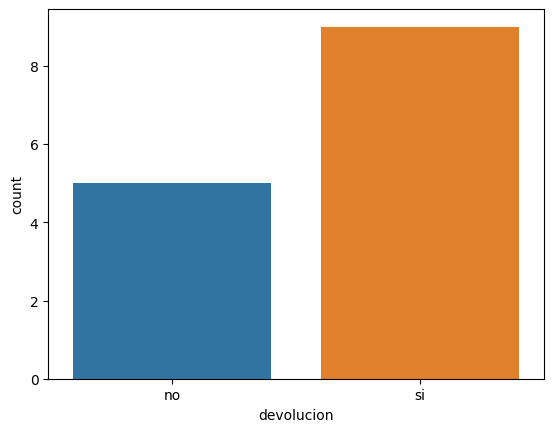

In [3]:
sns.countplot(x='devolucion', data=df)

In [4]:
print(df['devolucion'].value_counts())

si    9
no    5
Name: devolucion, dtype: int64


In [5]:
feature_val=df[features].value_counts()
print(feature_val)

edad    ingresos  estudios  credito  
joven   alto      no        excelente    1
                            normal       1
        bajo      si        normal       1
        medio     no        normal       1
                  si        excelente    1
maduro  alto      no        normal       1
                  si        normal       1
        bajo      si        excelente    1
        medio     no        excelente    1
viejo   bajo      si        excelente    1
                            normal       1
        medio     no        excelente    1
                            normal       1
                  si        normal       1
dtype: int64


In [6]:
edad=df.groupby(['edad'])['devolucion'].count()
edad

edad
joven     5
maduro    4
viejo     5
Name: devolucion, dtype: int64

In [7]:
estudios=df.groupby(['estudios'])['devolucion'].count()
estudios

estudios
no    7
si    7
Name: devolucion, dtype: int64

In [8]:
ingresos=df.groupby(['ingresos'])['devolucion'].count()
ingresos

ingresos
alto     4
bajo     4
medio    6
Name: devolucion, dtype: int64

In [9]:
credito=df.groupby(['credito'])['devolucion'].count()
credito

credito
excelente    6
normal       8
Name: devolucion, dtype: int64

In [10]:
P=pd.value_counts(df['devolucion'])
P

si    9
no    5
Name: devolucion, dtype: int64

In [11]:
Si=P.iloc[0:1] 
Si

si    9
Name: devolucion, dtype: int64

In [12]:
Nt=len(df['devolucion'])
Nt

14

In [13]:
Ppos=Si/Nt
Ppos

si    0.642857
Name: devolucion, dtype: float64

In [14]:
Pneg=1-Ppos
Pneg

si    0.357143
Name: devolucion, dtype: float64

In [15]:
Entropia=-Ppos*np.log2(Ppos)-Pneg*np.log2(Pneg)
Entropia

si    0.940286
Name: devolucion, dtype: float64

In [16]:
Et=len(df['edad'])

In [17]:
jovenes=df.loc[df['edad']=='joven']
jovenes

,edad,ingresos,estudios,credito,devolucion
0,joven,alto,no,normal,no
1,joven,alto,no,excelente,no
7,joven,medio,no,normal,no
8,joven,bajo,si,normal,si
10,joven,medio,si,excelente,si


In [18]:
claseJn=jovenes['devolucion'].value_counts()[0]
claseJn

3

In [19]:
ClaseJp=jovenes['devolucion'].value_counts()[1]
ClaseJp

2

In [20]:
print(f'jovenes que no devuelven son:{claseJn}')
print(f'jovenes que devuelven son:{ClaseJp}')

jovenes que no devuelven son:3
jovenes que devuelven son:2


In [21]:
PP=ClaseJp/Et
PP

0.14285714285714285

In [22]:
PN=1-PP
PN

0.8571428571428572

In [23]:
entropiaJ=-PP*np.log2(PP)-PN*np.log2(PN)
entropiaJ

0.5916727785823273

In [24]:
prob=(df['edad'].value_counts())/len(df['edad'])
prob

joven     0.357143
viejo     0.357143
maduro    0.285714
Name: edad, dtype: float64

In [25]:
def prob(nodo):
  return(df[nodo].value_counts())/len(df[nodo])
prob('edad')

joven     0.357143
viejo     0.357143
maduro    0.285714
Name: edad, dtype: float64

In [26]:
prob('ingresos')

medio    0.428571
alto     0.285714
bajo     0.285714
Name: ingresos, dtype: float64

In [27]:
prob('estudios')

no    0.5
si    0.5
Name: estudios, dtype: float64

In [28]:
prob('credito')

normal       0.571429
excelente    0.428571
Name: credito, dtype: float64

In [29]:
maduro=df.loc[df['edad']=='maduro']
maduro

,edad,ingresos,estudios,credito,devolucion
2,maduro,alto,no,normal,si
6,maduro,bajo,si,excelente,si
11,maduro,medio,no,excelente,si
12,maduro,alto,si,normal,si


In [30]:
claseMp=maduro['devolucion'].value_counts()[0]
claseMp

4

In [31]:
ClaseMn=0
ClaseMn

0

In [32]:
print(f'jovenes que no devuelven son:{ClaseMn}')
print(f'jovenes que devuelven son:{claseMp}')

jovenes que no devuelven son:0
jovenes que devuelven son:4


In [33]:
Ppm=claseMp/Et
Ppm

0.2857142857142857

In [34]:
Pnm=1-Ppm
Pnm

0.7142857142857143

In [35]:
entropiaM=-Ppm*np.log2(Ppm)-Pnm*np.log2(Pnm)
entropiaM

0.863120568566631

In [36]:
viejo=df.loc[df['edad']=='viejo']
viejo

,edad,ingresos,estudios,credito,devolucion
3,viejo,medio,no,normal,si
4,viejo,bajo,si,normal,si
5,viejo,bajo,si,excelente,no
9,viejo,medio,si,normal,si
13,viejo,medio,no,excelente,no


In [37]:
claseVp=viejo['devolucion'].value_counts()[0]
claseVp

3

In [38]:
claseVn=viejo['devolucion'].value_counts()[1]
claseVn

2

In [39]:
print(f'jovenes que no devuelven son:{claseVn}')
print(f'jovenes que devuelven son:{claseVp}')

jovenes que no devuelven son:2
jovenes que devuelven son:3


In [40]:
Ppv=claseVp/Et
Ppv

0.21428571428571427

In [41]:
Pnv=1-Ppv
Pnv

0.7857142857142857

In [42]:
entropiaV=-Ppv*np.log2(Ppv)-Pnv*np.log2(Pnv)
entropiaV

0.74959525725948

In [43]:
It=len(df['ingresos'])

In [44]:
bajo=df.loc[df['ingresos']=='bajo']
bajo

,edad,ingresos,estudios,credito,devolucion
4,viejo,bajo,si,normal,si
5,viejo,bajo,si,excelente,no
6,maduro,bajo,si,excelente,si
8,joven,bajo,si,normal,si


In [45]:
claseBp=bajo['devolucion'].value_counts()[0]
claseBp

3

In [46]:
claseBn=bajo['devolucion'].value_counts()[1]
claseBn

1

In [47]:
print(f'jovenes que no devuelven son:{claseBn}')
print(f'jovenes que devuelven son:{claseBp}')

jovenes que no devuelven son:1
jovenes que devuelven son:3


In [48]:
Ppb=claseBp/It
Ppb

0.21428571428571427

In [49]:
Pnb=1-Ppb
Pnb

0.7857142857142857

In [50]:
entropiaB=-Ppb*np.log2(Ppb)-Pnb*np.log2(Pnb)
entropiaB

0.74959525725948

In [51]:
medio=df.loc[df['ingresos']=='medio']
medio

,edad,ingresos,estudios,credito,devolucion
3,viejo,medio,no,normal,si
7,joven,medio,no,normal,no
9,viejo,medio,si,normal,si
10,joven,medio,si,excelente,si
11,maduro,medio,no,excelente,si
13,viejo,medio,no,excelente,no


In [52]:
claseMep=medio['devolucion'].value_counts()[0]
claseMep

4

In [53]:
claseMen=medio['devolucion'].value_counts()[1]
claseMen

2

In [54]:
print(f'jovenes que no devuelven son:{claseMen}')
print(f'jovenes que devuelven son:{claseMep}')

jovenes que no devuelven son:2
jovenes que devuelven son:4


In [55]:
Ppme=claseMep/It
Ppme

0.2857142857142857

In [56]:
Pnme=1-Ppme
Pnme

0.7142857142857143

In [57]:
entropiaMe=-Ppme*np.log2(Ppme)-Pnme*np.log2(Pnme)
entropiaMe

0.863120568566631

In [58]:
alto=df.loc[df['ingresos']=='alto']
alto

,edad,ingresos,estudios,credito,devolucion
0,joven,alto,no,normal,no
1,joven,alto,no,excelente,no
2,maduro,alto,no,normal,si
12,maduro,alto,si,normal,si


In [59]:
claseAp=alto['devolucion'].value_counts()[0]
claseAp

2

In [60]:
claseAn=alto['devolucion'].value_counts()[1]
claseAn

2

In [61]:
print(f'jovenes que no devuelven son:{claseAn}')
print(f'jovenes que devuelven son:{claseAp}')

jovenes que no devuelven son:2
jovenes que devuelven son:2


In [62]:
Ppa=claseAp/It
Ppa

0.14285714285714285

In [63]:
Pna=1-Ppa
Pna

0.8571428571428572

In [64]:
entropiaA=-Ppa*np.log2(Ppa)-Pna*np.log2(Pna)
entropiaA

0.5916727785823273

In [65]:
Et=len(df['estudios'])

In [66]:
Si=df.loc[df['estudios']=='si']
Si

,edad,ingresos,estudios,credito,devolucion
4,viejo,bajo,si,normal,si
5,viejo,bajo,si,excelente,no
6,maduro,bajo,si,excelente,si
8,joven,bajo,si,normal,si
9,viejo,medio,si,normal,si
10,joven,medio,si,excelente,si
12,maduro,alto,si,normal,si


In [67]:
ClaseSi=Si['estudios'].value_counts()

In [68]:
ClaseSi

si    7
Name: estudios, dtype: int64

In [69]:
Sip=ClaseSi/Et
Sip

si    0.5
Name: estudios, dtype: float64

In [70]:
Sin=1-Sip
Sin

si    0.5
Name: estudios, dtype: float64

In [71]:
entropiaE=-Sip*np.log2(Sip)-Sin*np.log2(Sin)
entropiaE

si    1.0
Name: estudios, dtype: float64

In [72]:
Ct=len(df['credito'])

In [73]:
normal=df.loc[df['credito']=='normal']
normal

,edad,ingresos,estudios,credito,devolucion
0,joven,alto,no,normal,no
2,maduro,alto,no,normal,si
3,viejo,medio,no,normal,si
4,viejo,bajo,si,normal,si
7,joven,medio,no,normal,no
8,joven,bajo,si,normal,si
9,viejo,medio,si,normal,si
12,maduro,alto,si,normal,si


In [74]:
claseNop=normal['devolucion'].value_counts()[0]
claseNop

6

In [75]:
claseNon=normal['devolucion'].value_counts()[1]
claseNon

2

In [76]:
print(f'jovenes que no devuelven son:{claseNon}')
print(f'jovenes que devuelven son:{claseNop}')

jovenes que no devuelven son:2
jovenes que devuelven son:6


In [77]:
PpNo=claseNop/Ct
PpNo

0.42857142857142855

In [78]:
PnNo=1-PpNo
PnNo

0.5714285714285714

In [79]:
entropiaNo=-PpNo*np.log2(PpNo)-PnNo*np.log2(PnNo)
entropiaNo

0.9852281360342515

In [80]:
excelente=df.loc[df['credito']=='excelente']
excelente

,edad,ingresos,estudios,credito,devolucion
1,joven,alto,no,excelente,no
5,viejo,bajo,si,excelente,no
6,maduro,bajo,si,excelente,si
10,joven,medio,si,excelente,si
11,maduro,medio,no,excelente,si
13,viejo,medio,no,excelente,no


In [81]:
claseExp=excelente['devolucion'].value_counts()[0]
claseExp

3

In [82]:
claseExn=excelente['devolucion'].value_counts()[1]
claseExn

3

In [83]:
print(f'jovenes que no devuelven son:{claseExn}')
print(f'jovenes que devuelven son:{claseExp}')

jovenes que no devuelven son:3
jovenes que devuelven son:3


In [84]:
PpEx=claseExp/Ct
PpEx

0.21428571428571427

In [85]:
PnEx=1-PpEx
PnEx

0.7857142857142857

In [86]:
entropiaEx=-PpEx*np.log2(PpEx)-PnEx*np.log2(PnEx)
entropiaEx

0.74959525725948